<a href="https://colab.research.google.com/github/Eric1891/Micro-Credential-winter-2022/blob/main/K1_nearest_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [22]:
dataset = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values    #variable isolates values for columns 'age' and 'EstimatedSalary'
y = dataset.iloc[:, -1].values   #variable isolates values for target

In [23]:
dataset.head() #show the first five rows 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Splitting the dataset into the Training set and Test set

In [26]:
from sklearn.model_selection import train_test_split 
#create test and train subsets, where  25% of the  dataset is  used fot testing, and  75% for training   the model
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [27]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(300, 2) (100, 2) (300,) (100,)


## Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #creating an instance  of the  standardscaler class
#substracts mean and scales to respective unit variance

#standardizing/scaling values of x_train
X_train = sc.fit_transform(X_train)
#applies the fit_transform method from the instance of the standardscaler class (sc) to scale the  
#training data(x_train) and to learn its  scaling parameters

#standardizing/scaling values of x_test
x_test = sc.transform(x_test)

## Training the K-NN model on the Training set

In [30]:
from sklearn.neighbors import KNeighborsClassifier
#designating the number of neighbors that will be used for the KNN model called calssifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
#default value for the distance metric=minkowki, p =power parameter for the minkowsky metric
classifier.fit(X_train, y_train)
#training the KNN model classifier with training data

KNeighborsClassifier()

## Predicting the Test set results

In [32]:
#vaiable stores the predicted y_test values generated by the KNN model classifier
y_pred = classifier.predict(x_test)

## Making the Confusion Matrix

In [33]:
#to access how well our model performs
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) #9actual values, predicted values
print(cm)

#64 True Negatives
#29 True positives

[[ 0 68]
 [ 0 32]]


## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


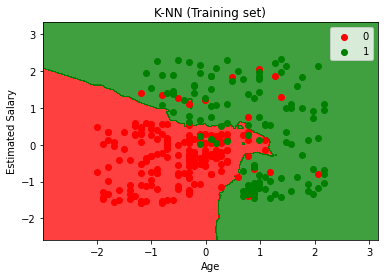

In [34]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train  #creating two additonal arrays that hold x_train and y_train values, respectively


#creating 2D grid from one dimensional arrays (which stemmed from the 'Age' and 'Estimated Salary' columns) (blue v red)
#start =(smallest value from all rows for first column 'Age' only ) minus one, 
#stop =(highest value from all rows from the first column of x_set) + 1, iterates through them with step=.01
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


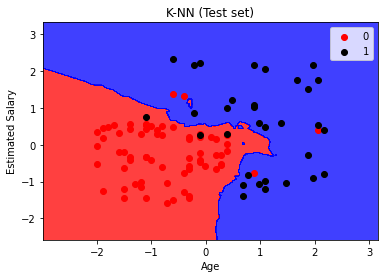

In [35]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test #creating two additonal arrays that hold x_train and y_train values, respectively

#creating 2D grid from one dimensional arrays (which stemmed from the 'Age' and 'Estimated Salary' columns) (blue v red)
#start =(smallest value from all rows for first column 'Age' only ) minus one, 
#stop =(highest value from all rows from the first column of x_set) + 1, iterates through them with step=.01
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
#same but foe the second column of x_set(aka x_train)  == Estimated Salary

#to dipaly 3D data in 2 dimensions, need plt.contour (grid of x value, grid of y value(will be represnted by contour level))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),    #third parameter (z) predicts y_train values (basically y_test_predict)
             alpha = 0.75, cmap = ListedColormap(('red', 'blue'))) #colors might be representing range of values in which the KNN model
             #predicted the y_train_predict would fall
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


#Iterates through the actual y_train and determines if the predicted y train are the same. if not the same, plots a red dot (0).
for i, j in enumerate(np.unique(y_set)): #y_set holds actual y_train values
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'black'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()